# Example 1

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("assignment/insurance_data.csv") #dataset containing age and bought_insurance as catagorical data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


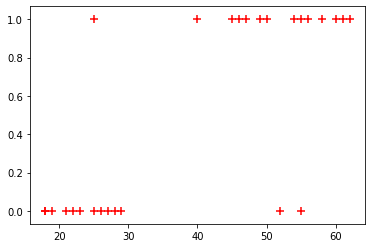

In [3]:
plt.scatter(df.age,df.bought_insurance,color='red', s=50, marker='+') #plotting the data 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9) #split data into train data and test data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train) #train the model using the train sets

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
X_test #testing data

,age
17,58
13,29
22,40


In [6]:
y_predicted = model.predict(X_test)
y_predicted 

array([1, 0, 1], dtype=int64)

In [7]:
model.predict_proba(X_test)

array([[0.08683461, 0.91316539],
       [0.79858063, 0.20141937],
       [0.4906219 , 0.5093781 ]])

In [8]:
model.score(X_test,y_test) 

1.0

# Example 2

In [9]:
df = pd.read_csv("assignment/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


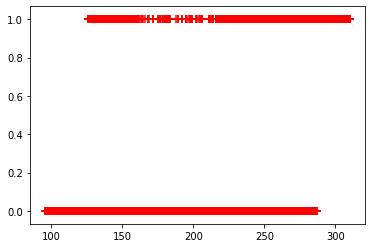

In [15]:
plt.scatter(df.average_montly_hours,df.left,color='red', s=50, marker='+') #plotting the data 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['average_montly_hours']],df.left,train_size=0.9) #split data into train data and test data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train) #train the model using the train sets

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_predicted = model.predict(X_test)
y_predicted 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
model.predict_proba(X_test)

array([[0.75988342, 0.24011658],
       [0.70339546, 0.29660454],
       [0.70263295, 0.29736705],
       ...,
       [0.80108401, 0.19891599],
       [0.74906012, 0.25093988],
       [0.79160853, 0.20839147]])

In [21]:
model.score(X_test,y_test) #shows accuracy of the model

0.7833333333333333

In [22]:
model.predict_proba(X_test) #shows probability of test data

array([[0.75988342, 0.24011658],
       [0.70339546, 0.29660454],
       [0.70263295, 0.29736705],
       ...,
       [0.80108401, 0.19891599],
       [0.74906012, 0.25093988],
       [0.79160853, 0.20839147]])

# Example 3

In [23]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#reading dataset containing marks of two exams for 50 students
data = pd.read_csv('assignment/Mark_Dataset.csv')

In [25]:
#X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [26]:
# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

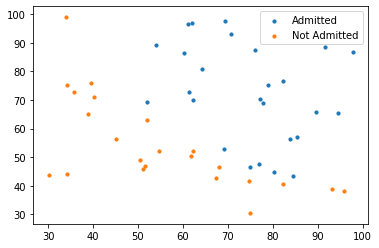

In [27]:
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [28]:
#training the model
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.matrix(np.zeros(X.shape[1]))

In [29]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [30]:
def cost_function(self, theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(self, theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [31]:
def fit(self, x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]
parameters = fit(X, y, theta)

TypeError: fit() missing 1 required positional argument: 'theta'

In [ ]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()